# Model Tuning and Precision-Recall trade off

*I generally write R, but am learning Python and want to practise some of what I have learnt on alternative datasets.*

In this kernel, I am going to explore how to tune a machine learning model. In choosing an optimum model, we make a choice between prioritising precision (fewer false positives) and recall (fewer false negatives), and this will depend on the problem/dataset.

To complete these tasks, I am going to use the Heart Disease dataset, using various patient variables to predict whether or not heart disease is present. 

## 1. Load in data and libraries

Firstly, I load in the libraries I will need, as well as the dataframe.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score,make_scorer

import matplotlib.pyplot as plt

heart = pd.read_csv('../input/heart.csv')

heart.shape

(303, 14)

## 2. Create a simple model

Next I create a simple logistic regression model to predict if a patient has heart disease. To do this, I firstly split the data into a training and testing set, maintaining the distribution of classes across both. 



In [2]:
# create X (predictors) and y (target)
X = heart.iloc[:,:-1]
y = heart.iloc[:,-1]


# create train test splits - random state sets seed so can replicate, whilst stratify maintains class distribution when splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,stratify = y)

# scale variables, applying scale of X_train to X_test to avoid data leakage
modelscaler = MinMaxScaler()
X_train = modelscaler.fit_transform(X_train)
X_test = modelscaler.transform(X_test)

# can see distribution of target value is v similar in both training and test sets
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

1    0.546256
0    0.453744
Name: target, dtype: float64
1    0.539474
0    0.460526
Name: target, dtype: float64


In [3]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


Next, I construct the model using the training dataset, and computing its overall accuracy performance on the test dataset.

In [4]:
# run logisitc regression with 10 fold cross validation

log_model = LogisticRegressionCV(cv = 10,max_iter = 4000).fit(X_train,y_train)

log_model.score(X_test,y_test)

0.868421052631579

## 3. Assessing model performance - Confusion Matrices

As mentioned as the start of the kernel, we can look deeper than just overall accuracy when assessing model performance. To do this, we can construct a confusion matrix, comparing predictions against the actual values.

In [5]:
preds = log_model.predict(X_test)

pd.DataFrame(confusion_matrix(preds,y_test))

,0,1
0,27,2
1,8,39


On the rows, we have predicted values, and on the columns we have the actual values. 1 denotes heart disease present.

* On the diagonal we have cases we have predicted accurately (positions 0,0 and 1,1). These are what are summed and divided by all cases to compute overall accuracy.
* On the off-diagonal (right to left) we have cases we have predicted inaccurately. 

We also have cases where we have:
* predicted 1 but they were actually 0; **false positives** (position 1,0)
* predicted 0 but they were actually 1; **false negatives** (position 0,1)

To better assess performance, we can use these values from the confusion matrix to compute **precision** and **recall**. 

* Precision: of all cases we predict as true, how many did we get right (TP/TP + FP). 
* Recall: of all the actually true cases, how many did we get right (TP/TP + FN).

We can calculate precision and recall for our model, and compare this to our overall acuracy score already computed.

In [6]:
print('Recall score\n')
print(recall_score(y_test,preds))
print('\nPrecision score: \n')
print(precision_score(y_test,preds))
print('\nAccuracy score \n')
print(accuracy_score(y_test,preds))


Recall score

0.9512195121951219

Precision score: 

0.8297872340425532

Accuracy score 

0.868421052631579


## 4. Precision-Recall trade off

There is a trade off taking place here; would we rather have high precision, where our predictions of positive cases are very accurate but perhaps a few actual true cases are missed, or would we rather have high recall, in which very few actual true cases are missed?

This is called the **Precision - Recall trade off**, and the answer depends on our data set/situation. If we think about the dataset we are dealing with, missing a case of heart disease and leaving that patient untreated is probably worse than calling a few extra people back who don't have heart disease but who the model would flag up; we are willing to accept more false positives than false negatives. Here therefore, we would rather have high recall than high precision. 


But how do we change the number of false positives/false negatives our model produces? Ultimately, our logistic regression estimated for each patient, how likely it was that there was heart disease present. The default decision boundary is 0.5; if the model considers the probabilty of heart disease being present to be > 50%, it will classify as true, if < 50% it will classify as false. By changing this decision boundary, we will change the number of false positives and false negatives, and hence the values of precision and recall.

## 5. Plotting the Precision-Recall Curve

We can actually plot the values of precision and recall our model will produce for every value of the decision boundary. I do this two ways below; first of all using the sklearn 'precision_recall_curve' which doesn't seem to give much granularity, followed by a manual more granular plot.


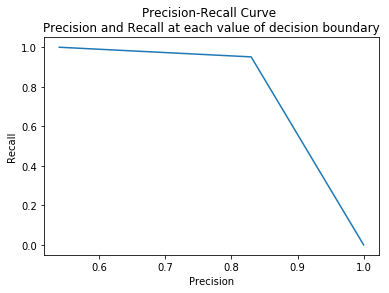

In [7]:
precision,recall,thresholds = precision_recall_curve(y_test,preds)

plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

In [8]:
yprobs = log_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['target'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['target']))
    recall.append(recall_score(y_test,tmp['target']))
    accuracy.append(accuracy_score(y_test,tmp['target']))



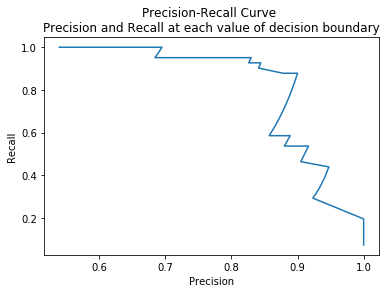

In [9]:
plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

We can see in the chart above, that where recall is 1, we have to accept lower levels of precision; in order to pick up more and more cases of heart disease, we have to accept lower accuracy in the ones we predict. However, at higher rates of precision, recall falls; if we want to only predict cases of heart disease where we are sure we are right, we are going to miss some more borderline cases. 

We could also plot for each level of the decision boundary, what would be our precision, recall AND overall accuracy.

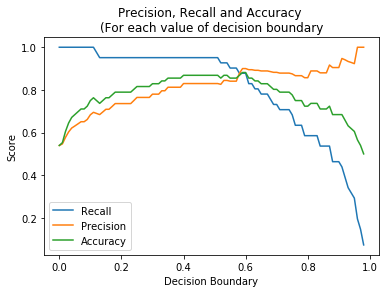

In [10]:
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For each value of decision boundary')
plt.xlabel('Decision Boundary')
plt.ylabel('Score')
_= plt.legend()

In the chart above, we can see precision and recall each plotted as a function of the decision boundary value. We can see clearly now, that the higher (more strict) the decision boundary for classifying heart disease, the higher our precision score, whilst lower (less strict) decision boundary values will result in a higher recall score. 

We can now also add in a line for total accuracy, which we can see rises up until about a decision boundary value of 0.6, and then begins to fall.

## 6. ROC curves and AUC (area under curve)

Precision-Recall curves are useful, but not the only way we can assess our model's performance. We can also plot what is known as an ROC curve, which essentially plots:
* **false positive rate** (how many patients falsely predicted as positive out of all actually negative cases: FP/TN + FP) 

against the

* **true positive rate** (same as recall - out of all actually true cases how many did we accurately predict: TP/TP + FN)

Like with the precision recall trade off, we can calculate our false positive and true positive rate for every value of the decision boundary and plot this as a curve. To illustrate this more, it is easiest to draw the curve.

## 7. Plotting the ROC curve

Again, we can use a built in method, which I do first, or a more granular manual method.

0.8613240418118467

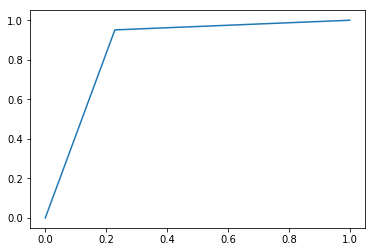

In [11]:
fpr,tpr,_ = roc_curve(y_test,preds,drop_intermediate = True)

plt.figure()
plt.plot(fpr,tpr)
roc_auc_score(y_test,preds)


In [12]:
fpr = []
tpr = recall

for t in np.arange(0,0.99,0.01):
    yprobs['target'] = np.where(yprobs.iloc[:,1] >=t,1,0)
    cm = confusion_matrix(yprobs['target'],y_test)
    tp = cm[1,1]
    fp = cm[1,0]
    tn = cm[0,0]
    fn = cm[0,1]
    
    fpr.append(fp/(tn+fp))

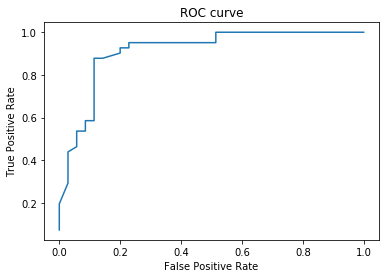

In [13]:
plt.figure()

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
_ = plt.title('ROC curve')


The ideal here, is to have the ROC curve as far into the top left as possible; we want to have a high true positive rate with as low a false positive rate as possible. We can measure how good our model is by calculating this area under the curve. This is helpful when we compare models.

In [14]:
print('AUC (area under curve) Score: {}'.format(roc_auc_score(y_test,preds)))

AUC (area under curve) Score: 0.8613240418118467


## 8. Model tuning with Grid Search

We can use GridSearch to see how changing parameters in the model impacts accuracy, precision, and recall scores. 

To illustrate I am going to fit a non-linear support vector to the model. Kernalised support vectors have a parameter gamma, which controls the 'similarity radius' of training points. Essentially, this impacts how complex our decision boundaries will be; low gamma means a high similarity radias (points far apart are considered similar), resulting in smoother boundaries, whilst high gamma means points further apart are considered less similar, leading to more complex decision boundaries. 

I am going to use GridSearch to find the value of parameter Gamma which optimises for overall accuracy, then precision, then recall. We will see that depending on what score we want to optimise for, we would select a different value of gamma.

Before any tuning takes place, we can compute Precision, Recall and accuracy scores setting gamma equal to 0.1. 

In [15]:
from sklearn.svm import SVC

# train model on training data selecting arbitrary gamma value = 0.1
svm_model = SVC(kernel = 'rbf',gamma =0.1).fit(X_train,y_train)

# predict on test data
preds = svm_model.predict(X_test)

print('Recall score:')
print(recall_score(y_test,preds))

print('\nPrecision score:')
print(precision_score(y_test,preds))

print('\nAccuracy score:')
print(accuracy_score(y_test,preds))

Recall score:
0.9024390243902439

Precision score:
0.8043478260869565

Accuracy score:
0.8289473684210527


Now, we can use grid search to consider a range of gamma values. We can then see which value of gamma we should use if we want to optimise our model for recall, precision or overall accuracy.



In [16]:
from sklearn.model_selection import GridSearchCV

gamma_values = {'gamma' : [0.01,0.1,0.5,1,5,10]}

svm = SVC(kernel = 'rbf')

gridsearch_recall = GridSearchCV(svm,param_grid = gamma_values,cv = 10,scoring = 'recall')
gridsearch_recall.fit(X_train,y_train)

gridsearch_precision = GridSearchCV(svm,param_grid = gamma_values,cv = 10,scoring = 'precision')
gridsearch_precision.fit(X_train,y_train)

gridsearch_accuracy = GridSearchCV(svm,param_grid = gamma_values, cv = 10,scoring = 'accuracy')
gridsearch_accuracy.fit(X_train,y_train)


print('Recall scoring:\n Best Gamma: {}\n Best Score: {}'.format(gridsearch_recall.best_params_,gridsearch_recall.best_score_))
print('Precision scoring:\n Best Gamma: {}\n Best Score: {}'.format(gridsearch_precision.best_params_,gridsearch_precision.best_score_))
print('Accuracy scoring:\n Best Gamma: {}\n Best Score: {}'.format(gridsearch_accuracy.best_params_,gridsearch_accuracy.best_score_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Recall scoring:
 Best Gamma: {'gamma': 0.01}
 Best Score: 0.9274822094205355
Precision scoring:
 Best Gamma: {'gamma': 1}
 Best Score: 0.8279173102961649
Accuracy scoring:
 Best Gamma: {'gamma': 1}
 Best Score: 0.8105726872246696


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We can see that the optimum gamma values are different depending on the accuracy metric we want to optimise for; if we care most about recall, we should use gamma = 0.01, whilst if we care most about precision or accuracy, we should use gamma = 1. 


Note that these 'best scores' are only for the metric being assessed. If we were to review the model which was optimising for a given metric, we can then calculate what would be the other accuracy scores computed from that model. Below, I am assessing the Recall optimised model, and computing all three accuracy scores from this model.

In [17]:
preds = gridsearch_recall.predict(X_train)

print('Recall score: {}\nPrecision Score: {}\nAccuracy Score: {}'.format(recall_score(y_train,preds),precision_score(y_train,preds),accuracy_score(y_train,preds)))

Recall score: 0.9193548387096774
Precision Score: 0.7354838709677419
Accuracy Score: 0.775330396475771


As this model optimises for recall, we can see unsurprisingly that recall is very high. However, this is at the expense of Precision and Accuracy which are now much lower than when we set gamma = 0.1 in the original model. 